# Wrangle and Analyze Data

#### Done by: REEM ALRASHOUD

## Table of Contents

* [Introduction](#intro)
* [Step 1: Gathering Data](#gather)
* [Step 2: Assessing Data](#asses)
* [Step 3: Cleaning Data](#clean)
* [Storing , Analysis , and Visualization](#SAV)

<a id='intro'></a>
## Introduction

This project points to urge quick data approximately puppy evaluations whereas illustrating progressed information wrangling and visualization strategies utilizing different Python libraries. I will assemble information from a assortment of sources and in a assortment of designs, evaluate its quality and tidiness, at that point clean it. Typically called information wrangling. The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, moreover known as WeRateDogs.

WeRateDogs may be a Twitter account that rates people's mutts with a amusing comment approximately the canine. The page has since developed greatly in popularity , with numerous clients sharing its substance and asking their pooches being appraised aswell. These appraisals nearly continuously have a denominator of 10. in spite of the fact that? Nearly continuously more prominent than 10. Since "they're great dogs."

**Note:** I did not use TWITTER API because they Couldn not support me with an access to developer account.

<a id='gather'></a>
## Step 1: Gathering Data

Here we will focus on three points of data:

**1-** `The WeRateDogs Twitter archive:`
"Existing file" the WeRateDogs Twitter file contains fundamental tweet information for all 5000+ of their tweets. (manual download of 'twitter-archive-enhanced-2.csv' ).

**2-** `The tweet image predictions:`
"Downable record" i.e., what breed of puppy or other obj, creature, etc. is display in each tweet agreeing to a neural network. This record (image_predictions.tsv) is facilitated on Udacity's servers and ought to be downloaded programmatically utilizing the Demands library and the taking after URL:
https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv.

**3-** `The twitter API data "JSON API file":`
with at least tweet ID, retweet tally, and favorite number in a record called 'tweet_json.txt' ,query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's whole set of JSON information in a record . Each tweet's JSON information ought to be composed to its possess line.

In [1]:
# import all needed packages
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import requests
import json
import os
import tweepy
import seaborn as sns
from IPython.display import Image

In [2]:
#1 : load csv file into df
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#2 : Import 'image-predictions.tsv' into a dataframe

name_of_file = 'image-predictions.tsv'

# Fetch data if file if doesn't exist
if not os.path.isfile(name_of_file):
    URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    response = requests.get(URL)

# Save the response to 'image-predictions.tsv' file if doesn't exist
if not os.path.isfile(name_of_file):
    with open(name_of_file, mode='wb') as file:
        file.write(response.content)
        
# Load the 'image-predictions.tsv' file into a dataframe
tweet_image = pd.read_csv(name_of_file, sep='\t')

In [4]:
Json_file='tweet-json.zip'
tweet_Json=pd.read_json(Json_file,lines=True)

In [5]:
tweet_Json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [6]:
tweet_image.shape

(2075, 12)

In [7]:
tweet_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
#3: connect to twitter API 
consumer_key = 'xxxx xxxx xxxx'
consumer_secret = 'xxxx xxxx xxxx'
access_token = 'xxxx xxxx xxxx'
access_secret = 'xxxx xxxx xxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [9]:
# store data on tweet_json.txt
Tweet_json = pd.read_json('tweet-json.txt', orient = 'records', lines =True)

In [10]:
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [70]:

#from tweepy import OAuthHandler
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = tweet_archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
       # count += 1
       # print(str(count) + ": " + str(tweet_id))
       # try:
    #    tweet = api.get_status(tweet_id, tweet_mode='extended')
      #      print("Success")
      #      json.dump(tweet._json, outfile)
      #      outfile.write('\n')
      #  except tweepy.TweepError as e:
      #      print("Fail")
      #      fails_dict[tweet_id] = e
      #      pass
#end = timer()
#print(end - start)
#print(fails_dict)

^ the outpot of the above code seems as ( fail ) , so I make it as a comment to view the process 

<a id='asses'></a>
## Step 2: Assessing Data

In [71]:
tweet_archive.head(2).T

,0,1
tweet_id,892420643555336193,892177421306343426
in_reply_to_status_id,NaN,NaN
in_reply_to_user_id,NaN,NaN
timestamp,2017-08-01 16:23:56 +0000,2017-08-01 00:17:27 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....
retweeted_status_id,NaN,NaN
retweeted_status_user_id,NaN,NaN
retweeted_status_timestamp,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/892420643...,https://twitter.com/dog_rates/status/892177421...


In [72]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [73]:
tweet_Json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [74]:
tweet_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [75]:
# check name column

tweet_archive['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Jeremy       1
Burt         1
Tiger        1
Taco         1
Lipton       1
Name: name, Length: 957, dtype: int64

In [76]:
# check consistency of numerators 
tweet_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [77]:
# Check for Zeroes numerators 
tweet_archive[tweet_archive.rating_numerator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [78]:
# check consistency of denominators 
tweet_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [79]:
# Check for Zeroes denominators  
tweet_archive[tweet_archive.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [80]:
# check jpg_url duplication 
sum(tweet_image.jpg_url.duplicated())

66

In [81]:
## Check if there are more retweets than favorites tweet 
tweet_Json[tweet_Json['retweet_count'] > tweet_Json['favorite_count']]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
31,2017-07-15 02:45:48+00:00,886054160059072513,886054160059072512,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,8.860534e+17,NaN
35,2017-07-13 01:35:06+00:00,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN
67,2017-06-26 00:13:58+00:00,879130579576475649,879130579576475648,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN
72,2017-06-24 00:09:53+00:00,878404777348136964,878404777348136960,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,NaN,NaN,NaN
73,2017-06-23 18:17:33+00:00,878316110768087041,878316110768087040,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,2016-06-25 01:52:36+00:00,746521445350707200,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactl...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Sat Nov 21 00:46:50 +0000 2015...,NaN,NaN,NaN
1041,2016-06-17 16:01:16+00:00,743835915802583040,743835915802583040,RT @dog_rates: Extremely intelligent dog here....,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Thu Nov 19 00:32:12 +0000 2015...,NaN,NaN,NaN
1240,2016-03-21 19:31:59+00:00,711998809858043904,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,False,"[0, 97]","{'hashtags': [{'text': 'LoveTwitter', 'indices...","{'media': [{'id': 711998175234510848, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Mon Mar 21 19:29:52 +0000 2016...,NaN,NaN,NaN
2257,2015-11-20 03:51:52+00:00,667550904950915073,667550904950915072,RT @dogratingrating: Exceptional talent. Origi...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548685090197504, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,NaN,NaN,NaN


In [82]:
# check the duplication of all tweet id , to determine if we can merge them or not
tweet_archive['tweet_id'].duplicated().sum()

tweet_image['tweet_id'].duplicated().sum()

tweet_Json['id'].duplicated().sum()

0

# Observations

## * Tidiness: ( Messy Data )

**1-** In the dataset of (twitter-archive-enhanced-2.csv) , we will find : doggo , floofer , pupper , and puppo are all dog stages for this reason we need to reduce the duplication by merge them in one column.

**2-** rating_numerator and rating_denominator can be combined in one column.

**3-** We have three Separate tabels which are (Twitter archive data + Image predictions data + Tweet json data) I will merge them in one table to be more specific.

## * Quality: ( Dirty Data )

**1-** Timestamp column has type object , I want to change it to datetime type because it more suitable.

**2-** We need to rename p1 , p2 , and p3 Columns to be clearer. Because it is not organized in a way of capital and small letters.

**3-** doggo, floofer, pupper, puppo columns contain 'None' value where NaN should be used.

**4-** jpg_url contains two different path patterns to jpg files,This seems not to have any impact if we don't remove the duplication.

**5-** There are no calculations so 'tweet_id' columns should be string "or object" types Instead of int.

**6-** 179 rows missing data for favorites_count , that means we have more retweets than favourite tweets (Unusual situation).

**7-** There are many unneeded retweets, so we have to remove any (Retweets).

**8-** Change sources to have only the specific type of device "Valid source".

**9-** Remove entries where p1_dog, p2_dog, and p3_dog are all "False" in tweet_image.

**10-** Proper extraction of ratings.

<a id='clean'></a>
## Step 3: Cleaning Data

In [111]:
# work on the copy of data 
tweet_archive_clean = tweet_archive.copy()
tweet_image_clean = tweet_image.copy()
tweet_Json_clean = tweet_Json.copy()


### Define (`Tidiness`)

We have three Separate tabels which are (Twitter archive data + Image predictions data + Tweet json data) I will merge them in one table to be more specific.

### Code

In [112]:
tweet_archive_clean = tweet_archive_clean.merge(tweet_image_clean, on='tweet_id', how='inner')
tweet_archive_clean = pd.merge(left=tweet_archive_clean, right=tweet_Json_clean, left_on='tweet_id', right_on='id', how='inner')
tweet_archive_clean = tweet_archive_clean.drop('id', axis=1)

### Test

In [113]:
tweet_archive_clean.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [114]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   int64              
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      2073 non-null   object             
 4   source_x                       2073 non-null   object             
 5   text                           2073 non-null   object             
 6   retweeted_status_id            79 non-null     float64            
 7   retweeted_status_user_id       79 non-null     float64            
 8   retweeted_status_timestamp     79 non-null     object             
 9   expanded_urls                  2073 non-null   object             
 10  rating_numerator        

### Define (`Tidiness`)

In the dataset of (twitter-archive-enhanced-2.csv) , we will find : doggo , floofer , pupper , and puppo are all dog stages for this reason we need to reduce the duplication by merge them in one column.

### Code

In [115]:
tweet_archive_clean.replace('None', np.nan, inplace=True)
tweet_archive_clean['dog_stage'] = tweet_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].fillna('').sum(axis=1).astype(str)


tweet_archive_clean.loc[tweet_archive_clean['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'doggo , puppo'
tweet_archive_clean.loc[tweet_archive_clean['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'doggo , floofer'
tweet_archive_clean.loc[tweet_archive_clean['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo , pupper'
tweet_archive_clean = tweet_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'] , axis = 1)

### Test

In [116]:
tweet_archive_clean.dog_stage.value_counts()

                   1753
pupper              210
doggo                67
puppo                23
doggo , pupper       11
floofer               7
doggo , floofer       1
doggo , puppo         1
Name: dog_stage, dtype: int64

### Define

 Proper extraction of ratings.

### Code

In [117]:
tweet_archive_clean['rating_numerator'].unique()

array([  13,   12,   14,    5,   11,   10,    6,   15,    0,   84,   24,
         75,   27,    3,    7,    8,    9,    4,  165, 1776,  204,   50,
         99,   80,   45,   60,   44,  143,  121,   26,    2,  144,   88,
          1,  420])

In [118]:
tweet_archive_clean['rating_numerator'] = tweet_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [119]:
tweet_archive_clean['rating_numerator'] = tweet_archive_clean['rating_numerator'].astype(str).astype(float)


### Test

In [122]:
# test numerators
tweet_archive_clean['rating_numerator'].unique()

array([1.300e+01, 1.200e+01, 1.400e+01, 1.350e+01, 1.100e+01, 1.000e+01,
       6.000e+00, 1.500e+01, 0.000e+00, 8.400e+01, 2.400e+01, 9.750e+00,
       5.000e+00, 1.127e+01, 3.000e+00, 7.000e+00, 8.000e+00, 9.000e+00,
       4.000e+00, 1.650e+02, 1.776e+03, 2.040e+02, 5.000e+01, 9.900e+01,
       8.000e+01, 4.500e+01, 6.000e+01, 4.400e+01, 1.430e+02, 1.210e+02,
       1.126e+01, 2.000e+00, 1.440e+02, 8.800e+01, 1.000e+00, 4.200e+02])

In [123]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   int64              
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      2073 non-null   object             
 4   source_x                       2073 non-null   object             
 5   text                           2073 non-null   object             
 6   retweeted_status_id            79 non-null     float64            
 7   retweeted_status_user_id       79 non-null     float64            
 8   retweeted_status_timestamp     79 non-null     object             
 9   expanded_urls                  2073 non-null   object             
 10  rating_numerator        

### Define 

rating_numerator and rating_denominator can be combined.

### Code

In [124]:
tweet_archive_clean['rating_percent'] = tweet_archive_clean.rating_numerator/tweet_archive_clean.rating_denominator
tweet_archive_clean

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,dog_stage,rating_percent
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,0.5
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,0.6
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,0.9
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,0.7


In [125]:
tweet_archive_clean.drop(columns=['rating_numerator','rating_denominator'], inplace=True)

### Test

In [126]:
tweet_archive_clean

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,dog_stage,rating_percent
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,0.5
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,0.6
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,0.9
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,,0.7


### Define 

Timestamp column has type object , I want to change it to datetime type because it more suitable.

### Code

In [127]:
tweet_archive_clean['timestamp'] = pd.to_datetime(tweet_archive_clean['timestamp'])

### Test

In [128]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   int64              
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      2073 non-null   datetime64[ns, UTC]
 4   source_x                       2073 non-null   object             
 5   text                           2073 non-null   object             
 6   retweeted_status_id            79 non-null     float64            
 7   retweeted_status_user_id       79 non-null     float64            
 8   retweeted_status_timestamp     79 non-null     object             
 9   expanded_urls                  2073 non-null   object             
 10  name                    

### Define

We need to rename p1 , p2 , and p3 Columns to be clearer. Because it is not organized in a way of capital and small letters.

### Code

In [129]:
tweet_image_clean.rename(columns = {"p1" :"prediction_Num_one" , "p2" :"prediction_Num_two" ,  "p3" :"prediction_Num_three"} , inplace = True )

### Test

In [130]:
tweet_image_clean.head()

,tweet_id,jpg_url,img_num,prediction_Num_one,p1_conf,p1_dog,prediction_Num_two,p2_conf,p2_dog,prediction_Num_three,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define

jpg_url contains two different path patterns to jpg files,This seems not to have any impact if we don't remove the duplication.

### Code

In [131]:
tweet_image_clean = tweet_image_clean.drop_duplicates(subset = ['jpg_url'], keep = 'last')

### Test

In [132]:
sum(tweet_image_clean.jpg_url.duplicated())

0

### Define

There are no calculations so 'tweet_id' columns should be string "or object" types Instead of int.

### Code

In [133]:
tweet_archive_clean['tweet_id'] = tweet_archive_clean['tweet_id'].astype(str)

### Test

In [134]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   object             
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      2073 non-null   datetime64[ns, UTC]
 4   source_x                       2073 non-null   object             
 5   text                           2073 non-null   object             
 6   retweeted_status_id            79 non-null     float64            
 7   retweeted_status_user_id       79 non-null     float64            
 8   retweeted_status_timestamp     79 non-null     object             
 9   expanded_urls                  2073 non-null   object             
 10  name                    

### Define

179 rows missing data for favorites_count , that means we have more retweets than favourite tweets (Unusual situation).

### Code

In [135]:
tweet_Json_clean = tweet_Json_clean.query('favorite_count != "0"')

### Test

In [136]:
tweet_Json_clean.query('favorite_count == "0"')

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


### Define

There are many unneeded retweets, so we have to remove any (Retweets).

### Code

In [137]:
No_retweets = tweet_archive_clean[tweet_archive_clean.retweeted_status_id.isna()]
No_retweets = tweet_archive_clean[tweet_archive_clean.retweeted_status_timestamp.isna()]
No_retweets = tweet_archive_clean[tweet_archive_clean.retweeted_status_user_id.isna()]
tweet_archive_clean = tweet_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

### Test

In [138]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   object             
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      2073 non-null   datetime64[ns, UTC]
 4   source_x                       2073 non-null   object             
 5   text                           2073 non-null   object             
 6   expanded_urls                  2073 non-null   object             
 7   name                           1496 non-null   object             
 8   jpg_url                        2073 non-null   object             
 9   img_num                        2073 non-null   int64              
 10  p1                      

### Define

Change sources to have only the specific type of device "Valid source".

### Code

In [139]:
tweet_archive_clean['source_x'] = tweet_archive_clean['source_x'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
tweet_archive_clean['source_x'] = tweet_archive_clean['source_x'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
tweet_archive_clean['source_x'] = tweet_archive_clean['source_x'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
tweet_archive_clean['source_x'] = tweet_archive_clean['source_x'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

### Test

In [140]:
tweet_archive_clean["source_x"].value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source_x, dtype: int64

### Define

Remove entries where p1_dog, p2_dog, and p3_dog are all "False" in tweet_image.

### Code

In [141]:
tweet_image_clean = tweet_image.query('p1_dog == True or p2_dog == True or p3_dog == True')

### Test

In [142]:
tweet_image_clean.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [143]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   object             
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      2073 non-null   datetime64[ns, UTC]
 4   source_x                       2073 non-null   object             
 5   text                           2073 non-null   object             
 6   expanded_urls                  2073 non-null   object             
 7   name                           1496 non-null   object             
 8   jpg_url                        2073 non-null   object             
 9   img_num                        2073 non-null   int64              
 10  p1                      

<a id='SAV'></a>
## Storing , Analysis , and Visualization

###  storing clean data:

In [144]:
tweet_archive_clean.to_csv('twitter_archive_master.csv', index=False)

### Insights:

In [145]:
data_tw = pd.read_csv("twitter_archive_master.csv")

In [146]:
# number of entries and columns in the dataset
tweet_archive_clean.shape

(2073, 51)

In [147]:
# shows the top 10 represented dog names in the dataset
Top_names=tweet_archive_clean['name'].value_counts().nlargest(10)
Top_names

a          55
Charlie    11
Penny      10
Tucker     10
Lucy       10
Oliver     10
Cooper     10
Sadie       8
Winston     8
Bo          8
Name: name, dtype: int64

In [148]:
# shows descriptive information about timestamp 
tweet_archive_clean['timestamp'].describe()

count                          2073
unique                         2073
top       2015-12-08 16:21:41+00:00
freq                              1
first     2015-11-15 22:32:08+00:00
last      2017-08-01 16:23:56+00:00
Name: timestamp, dtype: object

In [149]:
# shows descriptive information about ratings 
tweet_archive_clean['rating_percent'].describe()

count    2073.000000
mean        1.165780
std         3.986165
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating_percent, dtype: float64

In [150]:
# Show all retweet counts represented in the dataset
tweet_archive_clean['retweet_count'].value_counts()

1124    4
577     4
146     4
819     4
336     4
       ..
459     1
1292    1
4559    1
2512    1
4098    1
Name: retweet_count, Length: 1600, dtype: int64

In [151]:
# Show all favorite counts represented in the dataset
tweet_archive_clean['favorite_count'].value_counts()

0        79
2768      3
2706      3
2918      3
345       3
         ..
16983     1
23134     1
4707      1
2662      1
6138      1
Name: favorite_count, Length: 1851, dtype: int64

### Visualize data:

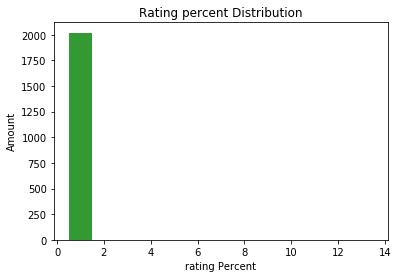

In [152]:
# the distribution of numerator ratings on a histogram
plt.figure(figsize=[6,4])
plt.hist(tweet_archive_clean['rating_percent'], bins=np.arange(0.5, 14.5, 1), alpha=0.8, color='green')
plt.xlabel('rating Percent')
plt.ylabel('Amount')
plt.title('Rating percent Distribution');

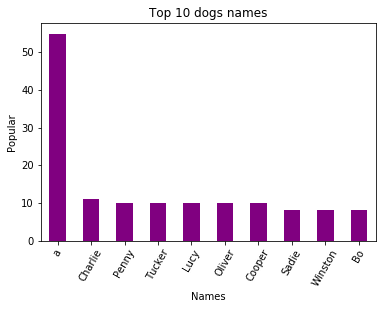

In [153]:
Top_names.plot(kind='bar', color="Purple")
plt.xticks(rotation=60)
plt.xlabel('Names')
plt.ylabel('Popular')
plt.title('Top 10 dogs names');
plt.show()

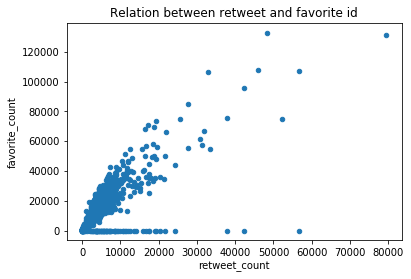

In [154]:
tweet_archive_clean.plot(x="retweet_count", y="favorite_count",kind="scatter")
plt.title('Relation between retweet and favorite id');
plt.show()

## Summary :

To accomplish the objectives of the examination, information have been assembled from diverse sources, counting the twitter as well as other web information. The possibilities of Python's pandas library has been utilized broadly on the appraisal and information cleaning parts.At the end I visualize the data by using specific sights.